In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from mpl_toolkits.axisartist.axislines import SubplotZero

Figure 7.1: Energetics for the generalized transition state theory

In [55]:
def potential_surface(x, x_b, n1, n2):
    y = np.ones_like(x)
    y[:x_b] += n1*norm.pdf(x[:x_b], x[x_b], 1)
    y[x_b:] += n2*norm.pdf(x[x_b:], x[x_b], 1)
    y[:x_b] = y[:x_b]+y[x_b]-y[x_b-1]
    return y

In [157]:
x_0 = np.linspace(0.45, 9, 10000)
y_E0 = potential_surface(x_0, 5000, 1.5, 2)
y_En = potential_surface(x_0, 6500, 1, 1.5)

y_0 = np.zeros_like(x_0)+y_E0[0]-y_E0[-1]
y_n = np.zeros_like(x_0)+y_E1[0]

x_s0 = np.zeros(50)+x_0[5000]
x_sn = np.zeros(50)+x_0[6500]
y_s0 = np.linspace(y_E0[0], y_E0[5000]-0.01, 50)-y_E0[-1]+0.01
y_sn = np.linspace(y_En[0], y_En[6500], 50)

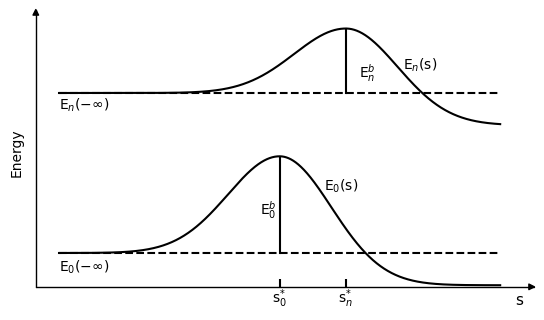

In [158]:
fig = plt.figure(figsize = (5.5,3.3))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)


# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

ax.plot(x_0, y_0+0.01, color = 'k', ls = '--')
ax.plot(x_0, y_E0-y_E0[-1]+0.01, color = 'k')
ax.text(x_0[6000], 0.6, r'E$_{0}$(s)')
ax.plot(x_s0, y_s0, color = 'k')
ax.text(x_0[0], 0.1, r'E$_{0}(-\infty)$')
ax.scatter(x_0[5000], 0, color = 'k', marker = 2)
ax.text(x_0[5000], -0.1, r's$_{0}^{*}$', ha = 'center')
ax.text(x_0[4550], 0.45, r'E$_{0}^{b}$')

ax.plot(x_0, y_n, color = 'k', ls = '--')
ax.plot(x_0, y_En, color = 'k')
ax.text(x_0[7800], 1.35, r'E$_{n}$(s)')
ax.plot(x_sn, y_sn, color = 'k')
ax.text(x_0[0], 1.1, r'E$_{n}(-\infty)$')
ax.scatter(x_0[6500], 0, color = 'k', marker = 2)
ax.text(x_0[6500], -0.1, r's$_{n}^{*}$', ha = 'center')
ax.text(x_0[6800], 1.3, r'E$_{n}^{b}$')

ax.set_ylim(0, y_En[6000]+0.1)
ax.set_xlim(0, 9.5)

ax.set_ylabel('Energy')
ax.text(9.3, -0.11, 's', fontsize = 11)

plt.tight_layout()
plt.savefig('Energy_GTST.png', dpi = 150)
plt.show()

Figure 7.2: Upper panel shows the one-dimensional Boltzmann-distribution at high and low temperature. The lower
panel the classical and quantum reaction probability as a function of kinetic energy

In [466]:
x_P = np.linspace(-4.5, 4.5, 1000)
y_P = 1/(1 + np.exp(-x_P))

x_low = np.linspace(-20, -15, 1000)
kT_low = (1.38*10**(-23))*5
y_low = (1/kT_low*10**(-22.25))*np.exp(-(x*10**(-22.7))/kT_low)

x_high = np.linspace(0, 12, 1000)
kT_high = (1.38*10**(-23))*5000
y_high = (1/kT_low*10**(-22.7))*np.exp(-(x*10**(-22.7))/kT_low)

x_sep = np.linspace(0, 16, 100)
y_sep = np.zeros(100)+y_low[-1]+1.25

x_E0 = np.zeros(100)+8
y_E0 = np.linspace(0, 1, 100)
x_1 = np.linspace(8, 16, 100)
y_1 = np.ones(100)

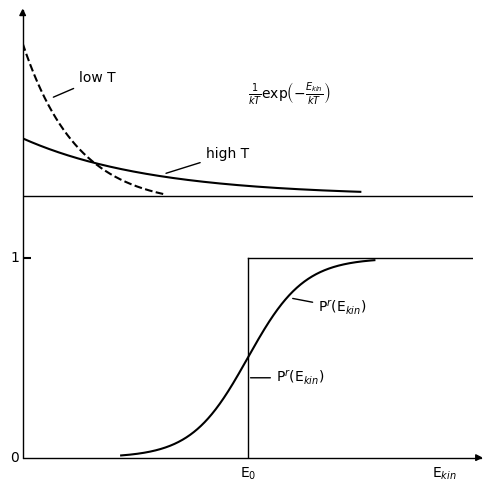

In [506]:
fig = plt.figure(figsize = (5, 5))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)


# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

ax.plot(x_P+8, y_P, color = 'k')
ax.annotate(r'P$^{r}$(E$_{kin}$)', xy = (9.5, 0.8), xytext = (10.5, 0.75), arrowprops=({'arrowstyle': '-', 'lw': 1, 
            'facecolor':'k'}), va = 'center')
ax.plot(x_E0, y_E0, color = 'k', lw = 1)
ax.annotate(r'P$^{r}$(E$_{kin}$)', xy = (8, 0.4), xytext = (9, 0.4), arrowprops=({'arrowstyle': '-', 'lw': 1, 
            'facecolor':'k'}), va = 'center')
ax.plot(x_1, y_1, color = 'k', lw = 1)
ax.scatter(0, 1, color = 'k', marker = 1)
ax.text(-0.45, 0, '0', va = 'center')
ax.text(-0.45, 1, '1', va = 'center')
ax.text(8, -0.1, r'E$_{0}$', ha = 'center')
ax.text(15, -0.1, r'E$_{kin}$', ha = 'center')

ax.plot(x_sep, y_sep, color = 'k', lw = 1)
ax.annotate('low T', xy = (1, 1.8), xytext = (2, 1.9), arrowprops=({'arrowstyle': '-', 'lw': 1, 
            'facecolor':'k'}), va = 'center')
ax.plot(x_low+20, y_low+1.26, color = 'k', ls = '--')
ax.annotate('high T', xy = (5, 1.42), xytext = (6.5, 1.52), arrowprops=({'arrowstyle': '-', 'lw': 1, 
            'facecolor':'k'}), va = 'center')
ax.plot(x_high, y_high+1.31, color = 'k')
ax.text(8, 1.8, r'$\frac{1}{kT}$exp$\left(-\frac{E_{kin}}{kT}\right)$')

plt.ylim(0,2.2)
plt.xlim(0, 16)

plt.tight_layout()
plt.savefig('BoltClassQ.png', dpi = 150)
plt.show()